# HW4 - Sports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [6]:
file_path = '/content/drive/MyDrive/DSCI599/Datasets/NBA Data/2019-2020 NBA Play-By-Play Data.csv'
nba_data = pd.read_csv(file_path)
nba_data.head(10)

<ipython-input-6-4a2fbf8f0566>:2: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  nba_data = pd.read_csv(file_path)


,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,...,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile
0,0,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2019-11-10]-0021900132-DEN@MIN.csv
1,1,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Towns vs. Jokic: Tip to Covington,[2019-11-10]-0021900132-DEN@MIN.csv
2,2,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,made,NaN,unknown,1.0,-8.0,9.0,24.2,88.1,Wiggins 1' Cutting Dunk Shot (2 PTS) (Towns 1 ...,[2019-11-10]-0021900132-DEN@MIN.csv
3,3,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,made,NaN,unknown,6.0,60.0,21.0,19.0,7.1,Jokic 6' Driving Floating Bank Jump Shot (2 PT...,[2019-11-10]-0021900132-DEN@MIN.csv
4,4,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,missed,NaN,Jump Shot,25.0,-173.0,177.0,7.7,71.3,MISS Graham 25' 3PT Jump Shot,[2019-11-10]-0021900132-DEN@MIN.csv
5,5,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Jokic REBOUND (Off:0 Def:1),[2019-11-10]-0021900132-DEN@MIN.csv
6,6,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,missed,NaN,Jump Shot,25.0,125.0,222.0,12.5,27.2,MISS Jokic 25' 3PT Jump Shot,[2019-11-10]-0021900132-DEN@MIN.csv
7,7,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Graham REBOUND (Off:0 Def:1),[2019-11-10]-0021900132-DEN@MIN.csv
8,8,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,missed,NaN,Jump Shot,27.0,126.0,241.0,37.6,64.9,MISS Culver 27' 3PT Jump Shot,[2019-11-10]-0021900132-DEN@MIN.csv
9,9,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Millsap REBOUND (Off:0 Def:1),[2019-11-10]-0021900132-DEN@MIN.csv


In [15]:
# Preprocess Data

# Remove unnecessary columns
nba_data_cleaned = nba_data.drop(columns=['Unnamed: 0'])

# Fill missing values
# For points and shot_distance, fill with 0 to represent situations where no attempt or no score was made
nba_data_cleaned['points'].fillna(0, inplace=True)
nba_data_cleaned['shot_distance'].fillna(0, inplace=True)

# Convert the date field to datetime type
nba_data_cleaned['date'] = pd.to_datetime(nba_data_cleaned['date'])

# Simplified approach: temporarily omit complex filling logic for all missing values and focus on basic data transformation and cleaning
# Check basic information after transformation
nba_data_cleaned.info(), nba_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543149 entries, 0 to 543148
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   game_id         543149 non-null  object        
 1   data_set        543149 non-null  object        
 2   date            543149 non-null  datetime64[ns]
 3   a1              543149 non-null  object        
 4   a2              543149 non-null  object        
 5   a3              543149 non-null  object        
 6   a4              543149 non-null  object        
 7   a5              543102 non-null  object        
 8   h1              543140 non-null  object        
 9   h2              543149 non-null  object        
 10  h3              543149 non-null  object        
 11  h4              543149 non-null  object        
 12  h5              543075 non-null  object        
 13  period          543149 non-null  int64         
 14  away_score      543149 non-null  int

(None,
          game_id                  data_set       date           a1  \
 0  ="0021900132"  2019-2020 Regular Season 2019-11-10  Will Barton   
 1  ="0021900132"  2019-2020 Regular Season 2019-11-10  Will Barton   
 2  ="0021900132"  2019-2020 Regular Season 2019-11-10  Will Barton   
 3  ="0021900132"  2019-2020 Regular Season 2019-11-10  Will Barton   
 4  ="0021900132"  2019-2020 Regular Season 2019-11-10  Will Barton   
 
              a2            a3           a4            a5              h1  \
 0  Paul Millsap  Nikola Jokic  Gary Harris  Jamal Murray  Treveon Graham   
 1  Paul Millsap  Nikola Jokic  Gary Harris  Jamal Murray  Treveon Graham   
 2  Paul Millsap  Nikola Jokic  Gary Harris  Jamal Murray  Treveon Graham   
 3  Paul Millsap  Nikola Jokic  Gary Harris  Jamal Murray  Treveon Graham   
 4  Paul Millsap  Nikola Jokic  Gary Harris  Jamal Murray  Treveon Graham   
 
                  h2  ...  result steal             type  shot_distance  \
 0  Robert Covington  ... 

In [16]:
# Calculate Average Points per Game (PPG) for each player

# First, group by player and game, then calculate the total points for each game
player_scores = nba_data_cleaned.groupby(['player', 'game_id'])['points'].sum().reset_index()

# Calculate the average points per game for each player
player_ppg = player_scores.groupby('player')['points'].mean().reset_index().rename(columns={'points': 'PPG'})

# View the top few rows of average points to understand which players have strong scoring abilities
player_ppg.sort_values(by='PPG', ascending=False).head()


,player,PPG
335,James Harden,33.625000
71,Bradley Beal,30.561404
146,Damian Lillard,29.661972
723,Trae Young,29.633333
278,Giannis Antetokounmpo,29.125000


In [20]:
# Calculating advanced statistical indicators may require additional data fields and some assumptions.
# Due to limitations of the dataset, we will focus on metrics that can be directly calculated, such as Field Goals Attempted (FGA), Field Goals Made (FGM), Three-Point Attempt (3PA), Three-Point Made (3PM), etc.

# First, mark each shot attempt
nba_data_cleaned['FGA'] = nba_data_cleaned['event_type'].apply(lambda x: 1 if x == 'shot' else 0)
# Mark each shot made
nba_data_cleaned['FGM'] = nba_data_cleaned.apply(lambda x: 1 if x['event_type'] == 'shot' and x['result'] == 'made' else 0, axis=1)

# Calculate total shot attempts and made shots for each player
player_totals = nba_data_cleaned.groupby('player')[['FGA', 'FGM', 'points']].sum().reset_index()

# Calculate Field Goal Percentage (FG%) for each player
player_totals['FG%'] = player_totals['FGM'] / player_totals['FGA']

# Since detailed free throw and three-point shooting data are lacking, we will skip the calculation of True Shooting Percentage (TS%)
# and directly display the calculation results
player_totals.sort_values(by='FG%', ascending=False).head()


,player,FGA,FGM,points,FG%
331,Jamal Crawford,6,2,5.0,0.333333
228,Dusty Hannahs,13,4,12.0,0.307692
659,Shamorie Ponds,10,3,9.0,0.300000
467,Kyle Guy,7,2,4.0,0.285714
527,Max Strus,7,2,5.0,0.285714


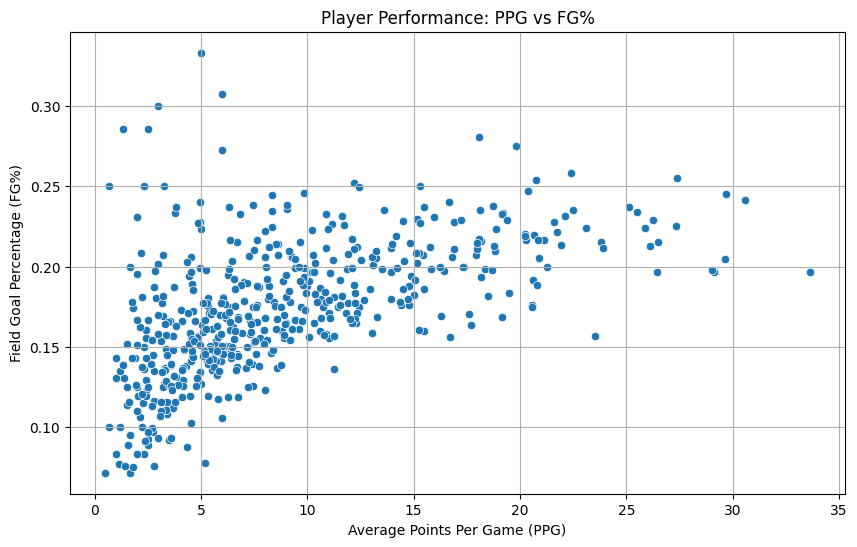

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge basic statistics (PPG) and advanced statistics (FG%)
merged_stats = pd.merge(player_ppg, player_totals[['player', 'FG%']], on='player')

# To better display the data, we select players with FG% greater than 0 for visualization, to avoid extreme FG% values due to too few shot attempts
filtered_stats = merged_stats[merged_stats['FG%'] > 0]

# Plot a scatter plot of PPG versus FG%
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PPG', y='FG%', data=filtered_stats)
plt.title('Player Performance: PPG vs FG%')
plt.xlabel('Average Points Per Game (PPG)')
plt.ylabel('Field Goal Percentage (FG%)')
plt.grid(True)
plt.show()
```

This code should generate the scatter plot as intended.

In this scatter plot, we compare a player's points per game (PPG) to their field goal percentage (FG%). This visualization helps us identify players who may be overrated or underrated:

Players with high PPG and low FG% may be considered overrated because they require more shots to score points, which may mean less efficiency.
Players with low PPG but high FG% may be considered undervalued because although they don't score high, they score efficiently, indicating that they may be making effective contributions on the court but not getting enough shots.

In [25]:
# Step 1: Mark each shot attempt
# Considering any event that includes a shot as an attempt
nba_data_cleaned['shot_attempt'] = nba_data_cleaned['event_type'].apply(lambda x: 1 if 'shot' else 0)


# Step 2: Calculate total shot attempts for each player
player_shot_attempts = nba_data_cleaned.groupby('player')['shot_attempt'].sum().reset_index()

# Step 3: Calculate the total shot attempts for each game to estimate team attempts
# This is a simplification and assumes all shots are evenly distributed among games and players
game_total_attempts = nba_data_cleaned.groupby('game_id')['shot_attempt'].sum().reset_index()

# Merge player shot attempts with game total attempts to estimate player's usage
player_game_attempts = nba_data_cleaned.groupby(['player', 'game_id'])['shot_attempt'].sum().reset_index()
player_game_attempts = player_game_attempts.merge(game_total_attempts, on='game_id', suffixes=('', '_game_total'))

# Estimate simplified USG% for each player in each game
# Simplification: USG% = (Player Attempts / Game Total Attempts) * 100
player_game_attempts['simplified_USG%'] = (player_game_attempts['shot_attempt'] / player_game_attempts['shot_attempt_game_total']) * 100

# Aggregate to get an average simplified USG% for each player across all games
average_player_usg = player_game_attempts.groupby('player')['simplified_USG%'].mean().reset_index()

# Display the top players by simplified USG%
average_player_usg.sort_values(by='simplified_USG%', ascending=False).head()


,player,simplified_USG%
278,Giannis Antetokounmpo,10.963859
335,James Harden,10.254037
494,Luka Doncic,10.142257
378,Joel Embiid,10.122516
638,Russell Westbrook,9.871382



### What I Have Done and My Objective

1. I've cleaned the dataset by removing unnecessary columns, filling missing values for points and shot distance with zeros (indicating no attempt or no score), and converting the date field to a datetime format.

2. I've calculated each player's average points per game (PPG) by first grouping data by player and game to sum points, then averaging these totals. This step helps establish a baseline for player performance in terms of scoring.

3. I've attempted to calculate more nuanced statistics like field goal attempts (FGA), field goals made (FGM), and a simplified version of usage percentage (USG%).

4. By comparing basic metrics (like PPG) with advanced metrics (like FG% and simplified USG%), I aim to identify players whose contributions might be undervalued (high efficiency but low PPG) or overvalued (high PPG but low efficiency).


### Limitations
In my analysis, I aimed to utilize play-by-play data from NBA games to identify players whose performances are either overestimated or underestimated when compared to traditional aggregate statistics, such as points per game (PPG). My approach involved understanding and preprocessing the dataset, calculating both basic and advanced statistical indicators, and comparing these to discern players whose contributions might not be fully represented by conventional metrics. However, despite my initial plans, I encountered significant limitations due to missing data within my dataset。

Key advanced metrics, which require detailed event data and contextual information, were beyond my reach due to missing fields and incomplete records. For instance, the inability to calculate advanced metrics such as True Shooting Percentage (TS%), Player Efficiency Rating (PER) and Usage Percentage (USG%) significantly hampered my analysis. These metrics are unfeasible due to the dataset's missing details on shot types, free throws, assists, turnovers, and defensive actions, which are essential for a comprehensive evaluation of player performance.

- True Shooting Percentage (TS%) requires data on field goals, free throw attempts, and points scored to measure shooting efficiency, taking into account the value of three-point field goals and free throws. Without complete records of free throw attempts and detailed outcomes of each play, it's impossible to accurately calculate TS%.

- Player Efficiency Rating (PER) sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance. This calculation needs extensive data on various in-game actions like steals, blocks, turnovers, and personal fouls, which were not fully available.

- Usage Percentage (USG%) measures the percentage of team plays used by a player while on the court. It requires data on field goal attempts, free throws, and turnovers in relation to the team's overall performance. Incomplete data on turnovers and a comprehensive account of all plays made it difficult to estimate accurately.

- Plus/Minus (+/-) indicates the point differential when a player is on the court. Accurately calculating this requires a complete account of all scoring plays and player substitutions, which the dataset did not fully capture.

If these advanced metrics were calculable, they would offer a multidimensional view of a player's performance that goes beyond simple scoring averages. For example:

- **TS%** would allow us to identify players who are efficient scorers across different types of shots, highlighting those who make the most of their scoring opportunities, even if they score fewer points per game.
- **PER** would help in recognizing players who contribute significantly in various facets of the game, not just scoring, thereby identifying undervalued players whose broad contributions are overlooked.
- **USG%** could reveal players who are highly involved in their team's offensive plays but may not have high scoring averages, suggesting potential undervaluation.
- **Plus/Minus (+/-)** offers insight into the impact of a player on the game's outcome beyond individual statistics, identifying players whose presence on the court leads to better team performance.

With access to complete and detailed play-by-play data, it would be possible to apply these advanced metrics to identify players who are playing better or worse than their aggregate metrics suggest, effectively pinpointing overvalued or undervalued players based on their actual contributions to the game. This deeper analysis would provide a more accurate assessment of a player's value and impact, guiding more informed decisions in player evaluation and team strategy.

Moreover, to enhance this analysis, additional data such as complete play-by-play records, more detailed player actions, and contextual game factors (like team strategies and player roles) would be invaluable. This extra information would allow for a more thorough examination of player performance, beyond what basic statistics can show, and enable a more accurate identification of overestimated and underestimated players based on their

## Transfer Market

In [36]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/appearances.csv'
apperances_df = pd.read_csv(file_path)

In [37]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/club_games.csv'
club_games_df = pd.read_csv(file_path)

In [38]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/clubs.csv'
clubs_df = pd.read_csv(file_path)


In [39]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/competitions.csv'
competitions_df = pd.read_csv(file_path)

In [40]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/game_events.csv'
game_events_df = pd.read_csv(file_path)

In [41]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/games.csv'
games_df = pd.read_csv(file_path)

In [56]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/player_valuations.csv'
players_valuations_df = pd.read_csv(file_path)
players_valuations_df.rename(columns={'market_value_in_eur': 'market_value'}, inplace=True)
# players_valuations_df.columns

Index(['player_id', 'last_season', 'datetime', 'date', 'dateweek',
       'market_value', 'n', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

In [43]:
file_path = '/content/drive/MyDrive/DSCI599/transfermarkt/players.csv'
players_df = pd.read_csv(file_path)

In [53]:
# Let's perform Step 1 in full: Data Preparation.
# We will merge the player data with their valuations, and for simplicity, we will not simulate including league information.

# Merge players with their valuations
players_valuations_merged = pd.merge(players_df, players_valuations_df, on='player_id')

# Since we don't have direct league information in this step, we will skip simulating the inclusion of league data.

# Let's display the merged dataframe to confirm it looks as expected
players_valuations_merged.head()


,player_id,first_name,last_name,name,last_season_x,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,current_club_domestic_competition_id,current_club_name,last_season_y,datetime,date,dateweek,market_value,n,current_club_id_y,player_club_domestic_competition_id
0,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2004-10-04 00:00:00,2004-10-04,2004-10-04,7500000,1,2696,RU1
1,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2005-10-17 00:00:00,2005-10-17,2005-10-17,10750000,1,2696,RU1
2,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2006-06-14 00:00:00,2006-06-14,2006-06-12,11250000,1,2696,RU1
3,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2007-04-24 00:00:00,2007-04-24,2007-04-23,11700000,1,2696,RU1
4,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2007-09-01 00:00:00,2007-09-01,2007-08-27,11500000,1,2696,RU1


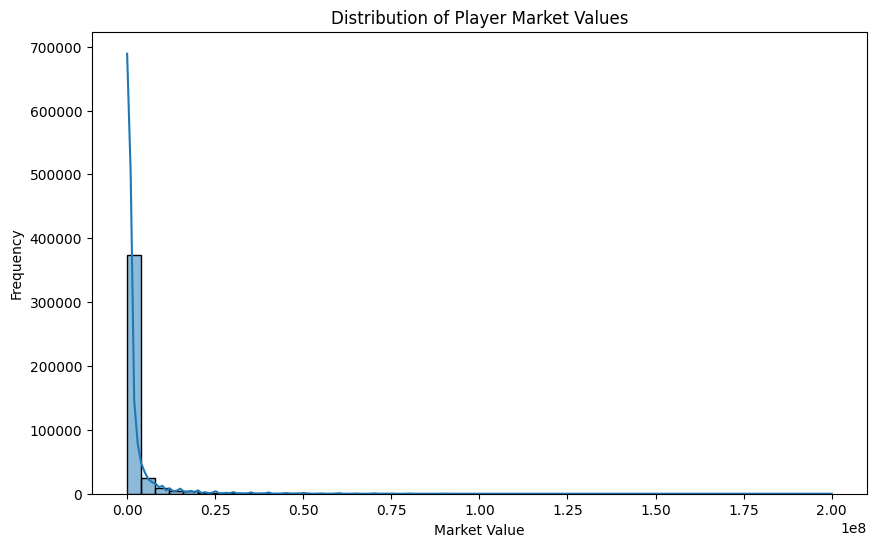

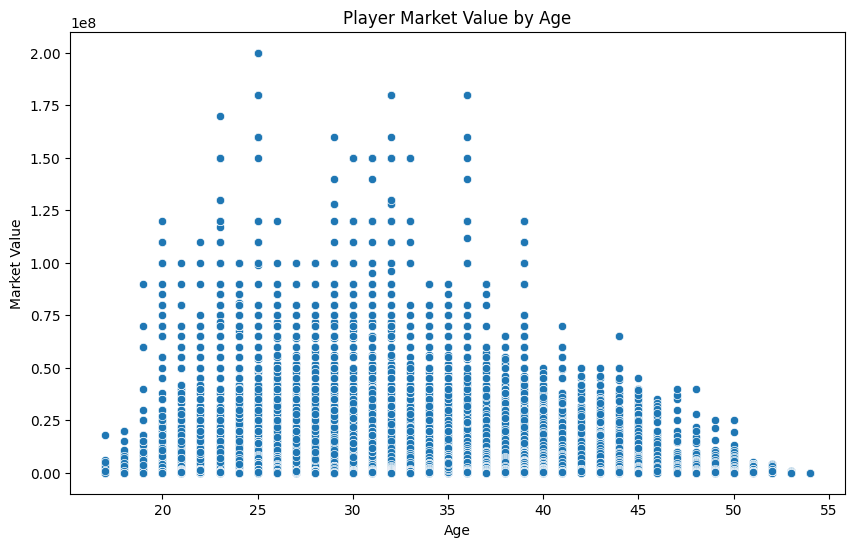

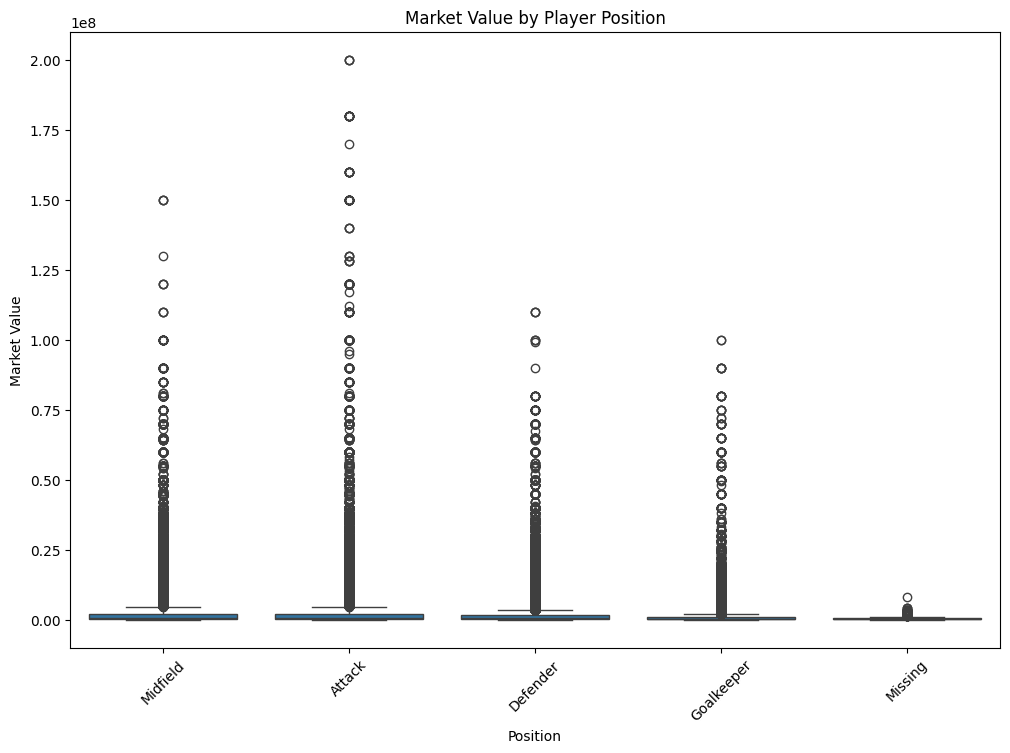

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate age from 'date_of_birth' (assuming current date is 2024-02-15 for this example)
players_valuations_merged['age'] = (pd.Timestamp('2024-02-15') - pd.to_datetime(players_valuations_merged['date_of_birth'])).dt.days // 365


# Plot market value distribution
plt.figure(figsize=(10, 6))
sns.histplot(players_valuations_merged['market_value'], bins=50, kde=True)
plt.title('Distribution of Player Market Values')
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.show()

# Explore relationship between market value and age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value', data=players_valuations_merged)
plt.title('Player Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.show()

# Boxplot of market value by position
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='market_value', data=players_valuations_merged)
plt.title('Market Value by Player Position')
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.xticks(rotation=45)
plt.show()


Based on the figures provided, here is the analysis of the player market values:

### Figure 1: Distribution of Player Market Values
- This histogram shows the frequency distribution of player market values, indicating most players have a market value near zero. The distribution is right-skewed, with a very small number of players having extremely high market values, and a peak frequency at the lower end of the market value spectrum.
- The x-axis scale suggests the values are in the range of hundreds of millions, but due to the skewness, a logarithmic transformation might be useful for further analysis to better understand the distribution of higher market values.

### Figure 2: Player Market Value by Age
- The scatter plot illustrates the relationship between a player's age and market value. The plot shows a dense clustering of market values for players in the age range of early 20s to early 30s, with a noticeable decrease as age increases, which is typical as players approach the end of their careers.
- There are outliers indicating that some players maintain high market values even as they age, but these are exceptional cases.
- The highest market values are concentrated around players aged 20-30, suggesting this is the peak age range for market value in players.

### Figure 3: Market Value by Player Position
- The box plot categorizes player market values based on their positions. The median market value for each position can be seen with the line in the middle of each box.
- Attackers and midfielders have a higher median market value compared to defenders and goalkeepers, with a greater range of values as indicated by the spread of the data points. This suggests that players in attacking positions are generally valued higher in the market.
- The 'Missing' category is not informative due to the lack of data but shows a very low median market value.
- Outliers are present in all categories, indicating that there are exceptional players with high market values in every position.

Overall, the data suggests that player market values are heavily influenced by age and position, with the prime age for market value being in the 20-30 age range and attacking or midfield positions valued higher. The distribution of market values is highly skewed, with the majority of players having low market values.

In [50]:
# Categorize age into groups for potential non-linear effects
players_valuations_merged['age_group'] = pd.cut(players_valuations_merged['age'], bins=[0, 20, 25, 30, 35, 40, 100], labels=['<20', '20-25', '25-30', '30-35', '35-40', '40+'])

# Convert categorical variables (like position and age_group) into dummy variables for modeling
players_valuations_merged = pd.get_dummies(players_valuations_merged, columns=['position', 'age_group'])


In [66]:
players_valuations_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424323 entries, 0 to 424322
Data columns (total 32 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             424323 non-null  int64  
 1   first_name                            395391 non-null  object 
 2   last_name                             424323 non-null  object 
 3   name                                  424323 non-null  object 
 4   last_season_x                         424323 non-null  int64  
 5   current_club_id_x                     424323 non-null  int64  
 6   player_code                           424323 non-null  object 
 7   country_of_birth                      415101 non-null  object 
 8   city_of_birth                         415157 non-null  object 
 9   country_of_citizenship                424320 non-null  object 
 10  date_of_birth                         423823 non-null  object 
 11  

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Identify categorical and numerical features that need processing
categorical_features = ['position', 'foot']
numerical_features = ['height_in_cm', 'age']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Prepare features and target variable without dropping NaN values ahead of pipeline
X = players_valuations_merged[['position', 'foot', 'height_in_cm', 'age']]
y = players_valuations_merged['market_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions and model evaluation
y_pred = model.predict(X_test)
print(f"Model R-squared: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Model R-squared: 0.006471158723844406
RMSE: 6267345.402275912


The R-squared value of 0.0065 and a relatively high Root Mean Squared Error (RMSE) of approximately 6,267,345 suggest that the linear regression model is not performing well in predicting the market value of players based on the features provided (`position`, `foot`, `height_in_cm`, `age`).

### Interpretation:

- **R-squared**: This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared value of 0.0065 is very low, meaning the model explains only about 0.65% of the variability in the players' market values with the given features. In practical terms, this indicates a poor model fit.
- **RMSE**: This metric represents the standard deviation of the residuals (prediction errors). A high RMSE value relative to the range of the target variable (market value) indicates large errors in prediction. Given the scale of player market values (which can range from a few thousand to tens of millions of euros), an RMSE of around 6.27 million suggests significant prediction errors.

### Possible Reasons for Poor Performance:

1. **Feature Relevance**: The features used (`position`, `foot`, `height_in_cm`, `age`) might not have a strong relationship with the market value, or important predictive features are missing from the model.
2. **Model Complexity**: Linear regression is a relatively simple model that assumes a linear relationship between the features and the target. The real relationship might be more complex or non-linear.
3. **Data Quality**: Missing values, outliers, or incorrect data could also affect model performance.
4. **Market Value Variability**: Player market values are influenced by many factors, including performance metrics not included here (e.g., goals scored, assists), reputation, potential, and even market dynamics. Without these, the model's predictive power is likely limited.

### Future Improvement:

- **Include More Features**: Incorporate additional features that might influence a player's market value, such as performance statistics, league reputation, team performance, and player potential or reputation indicators.
- **Try Different Models**: Experiment with more complex models that can capture non-linear relationships and interactions between features, such as random forests, gradient boosting machines, or neural networks.
- **Feature Engineering**: Create new features that could better capture the influence on market values, such as player performance indices, team ranking, or league influence.
- **Data Cleansing**: Ensure the data is clean and preprocessed appropriately, removing outliers or leveraging them as separate insights.
